# Principal Component Analysis
[理论学习](https://blog.csdn.net/hertzcat/article/details/81007285?utm_medium=distribute.pc_relevant.none-task-blog-OPENSEARCH-3.control&depth_1-utm_source=distribute.pc_relevant.none-task-blog-OPENSEARCH-3.control) 
  
这部分，你将运用PCA来实现降维。您将首先通过一个2D数据集进行实验，以获得关于PCA如何工作的直观感受，然后在一个更大的图像数据集上使用它。

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat 

## Example Dataset
为了帮助您理解PCA是如何工作的，您将首先从一个二维数据集开始，该数据集有一个大的变化方向和一个较小的变化方向。  

在这部分练习中，您将看到使用PCA将数据从2D减少到1D时会发生什么。

In [4]:
data = loadmat('data/ex7data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [5]:
X = data['X']

X.shape

(50, 2)

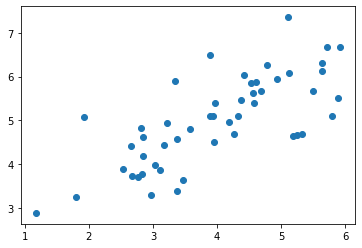

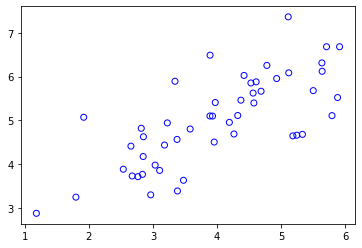

In [8]:
plt.scatter(X[:,0], X[:,1], facecolors='none', edgecolors='b')

## Implementing PCA
![](https://img.arctee.cn/202121271249-K.png)

In [9]:
# 归一化
def featureNormalize(X):
    means = X.mean(axis=0)
    stds = X.std(axis=0, ddof=1)
    X_norm = (X - means) / stds
    return X_norm, means, stds

由于我们的协方差矩阵为X.T@X, X中每行为一条数据，我们是想要对列(特征)做压缩。

这里由于是对协方差矩阵做SVD(), 所以得到的入口基其实为 V‘，出口基为V，可以打印出各自的shape来判断。

故我们这里是对 数据集的列 做压缩。

[这里讲的很棒](https://www.cnblogs.com/pinard/p/6251584.html)

In [10]:
def PCA(X):
    """
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html
    Args:
        X ndarray(m, n)
    Returns:
        U ndarray(n, n): principle components
    """
    
    sigma = (X.T @ X) / len(X)
    U, S, V = np.linalg.svd(sigma)
    
    return U, S, V

[-0.70710678 -0.70710678]


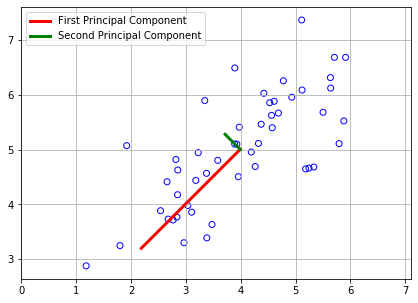

In [12]:
# 绘制主成分
X_norm, means, stds = featureNormalize(X)
U, S, V = PCA(X_norm)

print(U[:,0]) 
plt.figure(figsize=(7, 5))
plt.scatter(X[:,0], X[:,1], facecolors='none', edgecolors='b')

plt.plot([means[0], means[0] + 1.5*S[0]*U[0,0]], 
         [means[1], means[1] + 1.5*S[0]*U[0,1]],
        c='r', linewidth=3, label='First Principal Component')
plt.plot([means[0], means[0] + 1.5*S[1]*U[1,0]], 
         [means[1], means[1] + 1.5*S[1]*U[1,1]],
        c='g', linewidth=3, label='Second Principal Component')
plt.grid()
# changes limits of x or y axis so that equal increments of x and y have the same length
# 不然看着不垂直，不舒服。：）
plt.axis("equal")  
plt.legend()


## Dimensionality Reduction with PCA

In [13]:
# 特征映射
def projectData(X, U, K):
    Z = X @ U[:,:K]
    
    return Z

In [14]:
# project the first example onto the first dimension 
# and you should see a value of about 1.481
Z = projectData(X_norm, U, 1)
Z[0]

array([1.48127391])

In [15]:
## 重建数据
def recoverData(Z, U, K):
    X_rec = Z @ U[:,:K].T
    
    return X_rec

In [17]:
# you will recover an approximation of the first example and you should see a value of
# about [-1.047 -1.047].
X_rec = recoverData(Z, U, 1)
X_rec[0]

array([-1.04741883, -1.04741883])

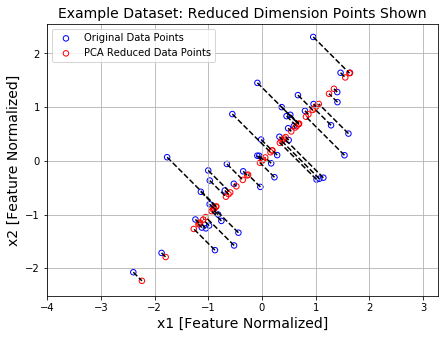

In [18]:
# Visualizing the projections
plt.figure(figsize=(7,5))
plt.axis("equal") 
plot = plt.scatter(X_norm[:,0], X_norm[:,1], s=30, facecolors='none', 
                   edgecolors='b',label='Original Data Points')
plot = plt.scatter(X_rec[:,0], X_rec[:,1], s=30, facecolors='none', 
                   edgecolors='r',label='PCA Reduced Data Points')

plt.title("Example Dataset: Reduced Dimension Points Shown",fontsize=14)
plt.xlabel('x1 [Feature Normalized]',fontsize=14)
plt.ylabel('x2 [Feature Normalized]',fontsize=14)
plt.grid(True)

for x in range(X_norm.shape[0]):
    plt.plot([X_norm[x,0],X_rec[x,0]],[X_norm[x,1],X_rec[x,1]],'k--')
    # 输入第一项全是X坐标，第二项都是Y坐标
plt.legend()

## Face Image Dataset